<a href="https://colab.research.google.com/github/JeetChauhan17/Spam-Ham-Classifier/blob/main/Spam_Ham_Classification_Model_Made_By_Jeet_Chauhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam/Ham Classification - Made By Jeet S. Chauhan

This is a Spam/Ham Classification model made using Python with the help of many ML Liabraries like : SKlearn, Numpy, Pandas and NLTK. We have plotted the body length distribution at the end with the help of MatPlotLib Liabrary.

This Project encompasses many topics in NLP. Topics such as Tokenization, Removing Stopwords, Stemming, Lemmenting, Vectorization, use of Sparse Matrix which ultimately help creating this project.

This project works basically by reducing the contents of message into keywords with no punctuations and using that to train a model which can then classify new unseen messages into Spam or Ham.

NLTK- Natural Language Toolkit- The NLTK is the most utilised package for handling natural language processing tasks. It is an open source library.

# Importing Libraries - NLTK, Pandas, Numpy :





In [ ]:
# !pip install nltk
!pip install -U scikit-learn
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import warnings
import sklearn
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading The Dataset

In [ ]:
datas = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
datas.columns =['label', 'body_text']
datas.head()


,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# Checking the Contents using column names and index.

In [ ]:
datas['label'][0], datas['body_text'][0]

('ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.")

In [ ]:
datas['body_text'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

#Shape Of Data :

In [ ]:
print("The Dataset has {} Rows and {} Columns".format(len(datas), len(datas.columns)))

The Dataset has 5568 Rows and 2 Columns


#Number Of Spam and Ham Data :

In [ ]:
print("There is total {} Number of Spam Data and {} number of Ham data. Out of {} number of Data.".format(len(datas[datas['label']=="spam"]), len(datas[datas['label']=="ham"]),len(datas)))

There is total 746 Number of Spam Data and 4822 number of Ham data. Out of 5568 number of Data.


Number of Missing Data :

In [ ]:
print("There are {} number of missing data.".format(datas['label'].isnull().sum()))
print("There are {} number of missing data.".format(datas['body_text'].isnull().sum()))

There are 0 number of missing data.
There are 0 number of missing data.


#Preprocessing Data - Cleaning Up Data :


### Removing Punctuation from body text :

In [ ]:
import string

def rem_punct(text):
  nopunct_text = "".join([char for char in text
                          if char not in string.punctuation])
  return nopunct_text



In [ ]:
datas['body_clean'] = datas['body_text'].apply(lambda x:rem_punct(x))
datas.head()

,label,body_text,body_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


###Tokenization - Splitting sentences into tokens or keywords :

In [ ]:
import re

def tokenize(text):
  tokens = re.split('\W',text)
  return tokens

datas['tokenized_text'] = datas['body_clean'].apply(lambda x:tokenize(x.lower()))
datas.head()

,label,body_text,body_clean,tokenized_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


###Removing Stopwords - Removing unnecesaary words like the, but, etc.

In [ ]:
stopwrds = nltk.corpus.stopwords.words('english')

def rem_stopwrds(tokenized_text):
  text = [word for word in tokenized_text if word not in stopwrds]

  return text

In [ ]:
datas['no_stop'] = datas['tokenized_text'].apply(lambda x:rem_stopwrds(x))
datas.head()

,label,body_text,body_clean,tokenized_text,no_stop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


###Stemming - Reducing words with similar inflection or derived words to their stem or root :

In [ ]:
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

datas['stemmed_text']=datas['no_stop'].apply(lambda x:stemming(x))

datas.head()

,label,body_text,body_clean,tokenized_text,no_stop,stemmed_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


###Lemmatization - Grouping together inflected form of words so they can be analysied as a single term, the words lemma.

In [ ]:
wnl = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text = [wnl.lemmatize(word) for word in tokenized_text]
  return text


In [ ]:
datas['lemmatied_text'] = datas['no_stop'].apply(lambda x:lemmatizing(x))

datas.head()

,label,body_text,body_clean,tokenized_text,no_stop,stemmed_text,lemmatied_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


###Vectorization - Process of encoding integers as feature vectors.

###Count Vectorization- Used to Create a document-term matrix that has entry of each cell which will be a count of the number of times that word occured in that document :




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W',text)
  text = [ps.stem(word) for word in tokens if word not in stopwrds]
  return text

count_vect = CountVectorizer(analyzer = clean_text)
X_count = count_vect.fit_transform(datas['body_text'])

print(X_count.shape)

(5568, 8107)


Applying Count Vectorization to small sample

In [ ]:
data_sample = datas[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_count_sample = count_vect_sample.fit_transform(data_sample['body_text'])

print(X_count_sample.shape)

(20, 202)


###Sparse Matrix - A Matrix of zeros and ones (Mostly zero). And to be efficient, it shows only non-zero Entries.

In [ ]:
X_count_sample

<20x202 sparse matrix of type '<class 'numpy.int64'>'
	with 231 stored elements in Compressed Sparse Row format>

In [ ]:
X_count_df = pd.DataFrame(X_count_sample.toarray())
X_count_df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

X_count_df.columns= count_vect_sample.get_feature_names_out()
X_count_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


###TF/IDF (Term Frequency, Inverse Document Frequency) - Creates Document amtrix where column represents Unirams and cells represent weighting which represents importance of word to the document.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(datas['body_text'])

print(X_tfidf.shape)


(5568, 8107)


Applying TfidVectorizer to a small sample :



In [ ]:
data_sample = datas[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer = clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(X_tfidf_sample.shape)

(20, 202)


#Feature Engineering - Feature Creation :

In [ ]:
datas=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

datas.columns=['label','body_text']

datas.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


##Feature Creation - Text Message Length :


In [ ]:
datas['body_len']=datas["body_text"].apply(lambda x:len(x)-x.count(" "))

datas.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


##Feature Creation - Percentage for Punctuation :

In [ ]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

datas['punct%']=datas['body_text'].apply(lambda x:count_punct(x))

datas.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


#Plotting :

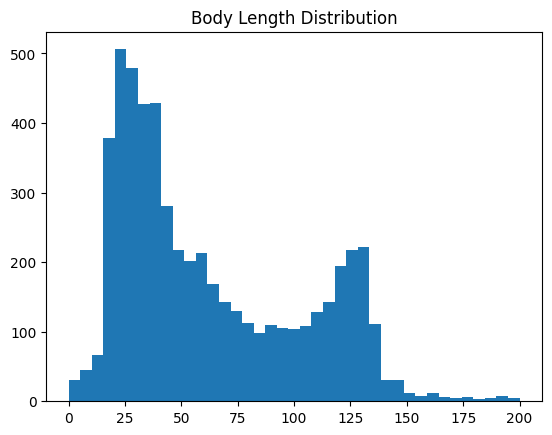

In [ ]:

bins=np.linspace(0,200,40)

plt.hist(datas['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

# Building Machine Learning Classifiers using Random Forest Model

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [ ]:
datas=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

datas.columns=['label','body_text']

datas.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

datas['body_len']=datas["body_text"].apply(lambda x:len(x)-x.count(" "))
datas['punct%']=datas['body_text'].apply(lambda x:count_punct(x))

datas.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [ ]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwrds]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(datas['body_text'])

X_features=pd.concat([datas['body_len'],datas['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model using K-Fold cross validation

In [ ]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==0.24.2
# !pip install --upgrade scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

X_features.columns = X_features.columns.astype(str)

rf = RandomForestClassifier(n_jobs=1)
k_fold = KFold(n_splits=5)


# cross_val_score(rf, X_features, datas['label'],cv=k_fold, scoring='accuracy',n_jobs=1)
cross_val_score(rf, X_features, datas['label'], cv=k_fold, scoring='accuracy', n_jobs=1, error_score='raise')

array([0.97576302, 0.97935368, 0.97486535, 0.96675651, 0.97124888])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_features, datas['label'],test_size=0.3,random_state=0)

In [ ]:
rf=RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train, y_train)

In [ ]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.05589107259462355, 'body_len'),
 (0.035309115924313926, '1804'),
 (0.0320677526591117, '7353'),
 (0.02792243291756452, '4799'),
 (0.024980189965750098, '3135'),
 (0.023578588745793945, '2032'),
 (0.0172406756353475, '7030'),
 (0.016575297062062115, '6288'),
 (0.01655356668368444, '6749'),
 (0.014723961121597849, '5727')]

In [ ]:
y_pred= rf_model.predict(X_test)

precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam',average='binary')

In [ ]:
print('Precision {} / Recall {} / Accuracy {}'.format(round(precision,3),
                                                     round(recall,3),
                                                     round((y_pred==y_test).sum()/len(y_pred),3)))

Precision 1.0 / Recall 0.56 / Accuracy 0.936


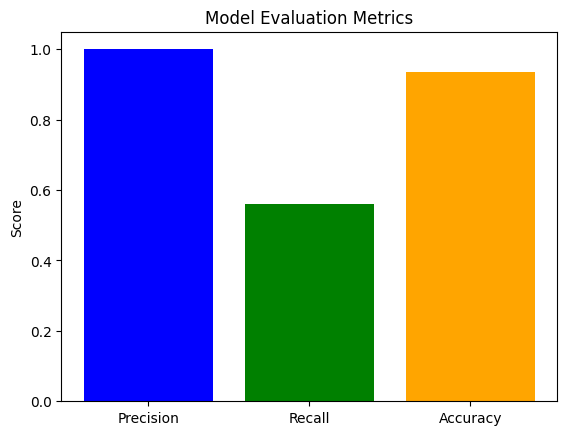

In [74]:
labels = ['Precision', 'Recall', 'Accuracy']
metrics = [precision, recall, (y_pred == y_test).sum() / len(y_pred)]

plt.bar(labels, metrics, color=['blue', 'green', 'orange'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()